## Name: Ahmed Yousri

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("loans.csv", index_col= "client_id")

In [3]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
df.shape

(443, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [6]:
df['loan_id'] = df['loan_id'].astype('object')

In [7]:
df['loan_id'] = df['loan_id'].astype('float64')

In [8]:
# df['loan_type'] = df['loan_type'].astype('float64')

In [9]:
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')

df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   loan_type    443 non-null    object        
 1   loan_amount  443 non-null    int64         
 2   repaid       443 non-null    int64         
 3   loan_id      443 non-null    float64       
 4   loan_start   443 non-null    datetime64[ns]
 5   loan_end     443 non-null    datetime64[ns]
 6   rate         443 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 27.7+ KB


In [11]:
df.describe()

,loan_amount,repaid,loan_id,loan_start,loan_end,rate
count,443.000000,443.000000,443.000000,443,443,443.000000
mean,7982.311512,0.534989,11017.101580,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156
min,559.000000,0.000000,10009.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000
25%,4232.500000,0.000000,10507.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000
50%,8320.000000,1.000000,11033.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000
75%,11739.000000,1.000000,11526.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000
max,14971.000000,1.000000,11991.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000
std,4172.891992,0.499338,581.826222,NaN,NaN,2.397168


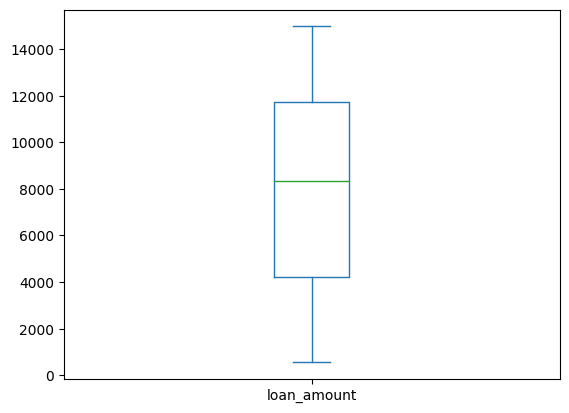

In [12]:
df['loan_amount'].plot(kind='box')
plt.show()

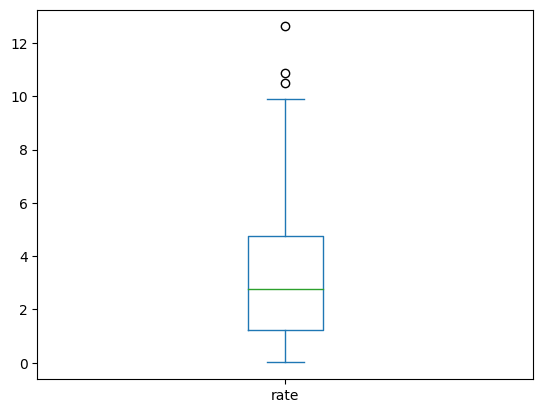

In [13]:
df['rate'].plot(kind = 'box')
plt.show()

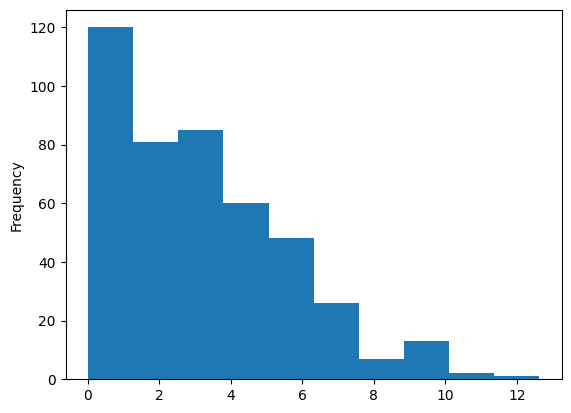

In [14]:
df['rate'].plot(kind = 'hist')
plt.show()

<ipython-input-15-d61b353871ec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'],ax =axes[0])


<Axes: xlabel='rate', ylabel='Density'>

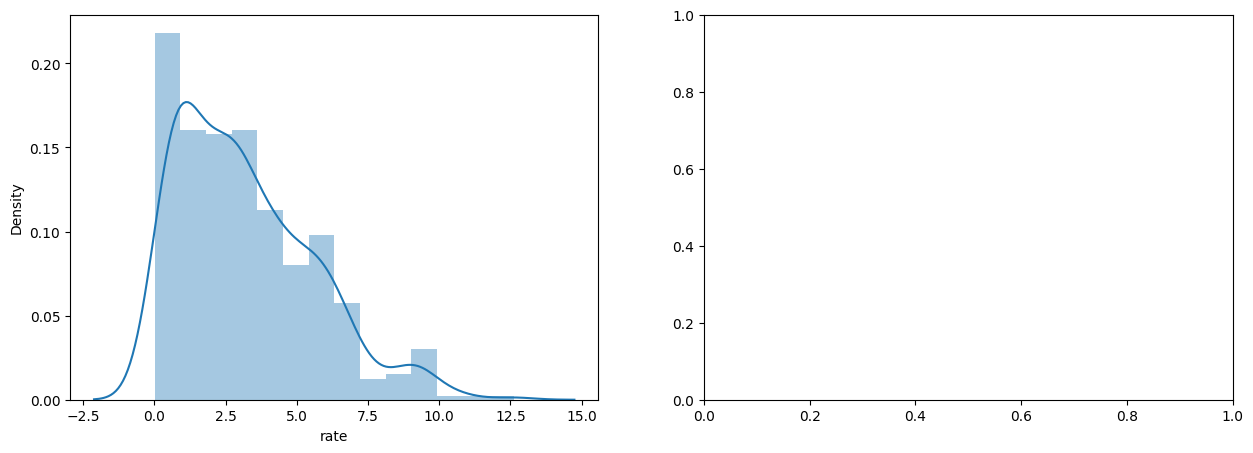

In [15]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['rate'],ax =axes[0])

In [16]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [17]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
client_id,,,,,,,,
46109,home,13672,0,10243.0,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984.0,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990.0,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596.0,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415.0,2010-07-07,2012-05-21,3.13,1.769181


In [18]:
df.describe()

,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
count,443.000000,443.000000,443.000000,443,443,443.000000,443.000000
mean,7982.311512,0.534989,11017.101580,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156,1.652859
min,559.000000,0.000000,10009.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000,0.100000
25%,4232.500000,0.000000,10507.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000,1.104536
50%,8320.000000,1.000000,11033.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000,1.667333
75%,11739.000000,1.000000,11526.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000,2.179449
max,14971.000000,1.000000,11991.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000,3.552464
std,4172.891992,0.499338,581.826222,NaN,NaN,2.397168,0.697359


In [19]:
print(df.rate.skew())
print(df.sqrt_rate.skew())

0.884204614329943
0.04964154055528862


In [20]:
print(df.rate.kurt())
print(df.sqrt_rate.kurt())

0.42437165143736433
-0.6318437642052039


<ipython-input-21-f22f6b21f2a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'],ax =axes[0])
<ipython-input-21-f22f6b21f2a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqrt_rate'],ax =axes[1])


<Axes: xlabel='sqrt_rate', ylabel='Density'>

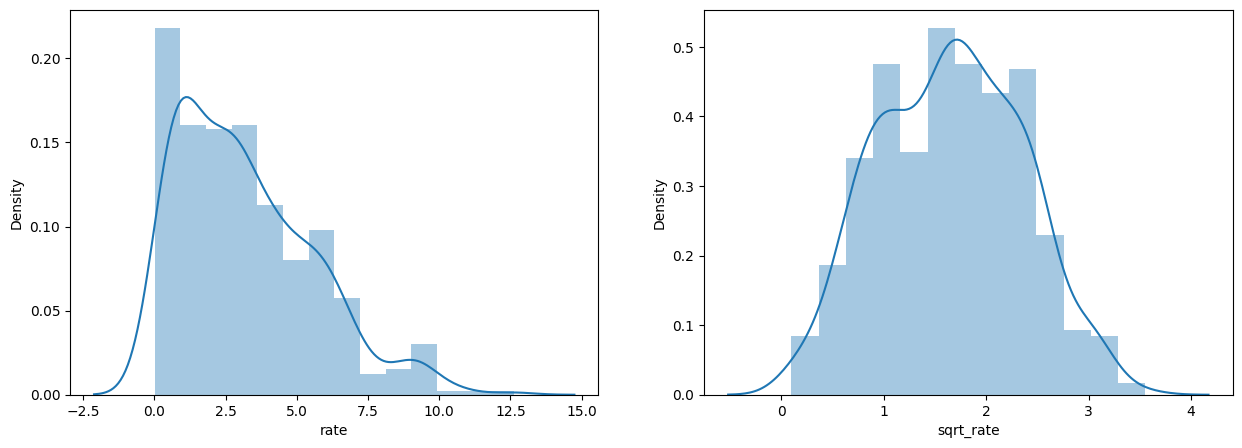

In [21]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['rate'],ax =axes[0])
sns.distplot(df['sqrt_rate'],ax =axes[1])


In [22]:
df['log_rate'] = np.log(df['rate'])

In [23]:
df.describe()

,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate
count,443.000000,443.000000,443.000000,443,443,443.000000,443.000000,443.000000
mean,7982.311512,0.534989,11017.101580,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156,1.652859,0.763656
min,559.000000,0.000000,10009.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000,0.100000,-4.605170
25%,4232.500000,0.000000,10507.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000,1.104536,0.198851
50%,8320.000000,1.000000,11033.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000,1.667333,1.022451
75%,11739.000000,1.000000,11526.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000,2.179449,1.558145
max,14971.000000,1.000000,11991.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000,3.552464,2.535283
std,4172.891992,0.499338,581.826222,NaN,NaN,2.397168,0.697359,1.110540


<ipython-input-24-9e531ed811be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'],ax =axes[0])
<ipython-input-24-9e531ed811be>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqrt_rate'],ax =axes[1])
<ipython-input-24-9e531ed811be>:4: UserWarning: 

`distplot` is a deprecated func

<Axes: xlabel='log_rate', ylabel='Density'>

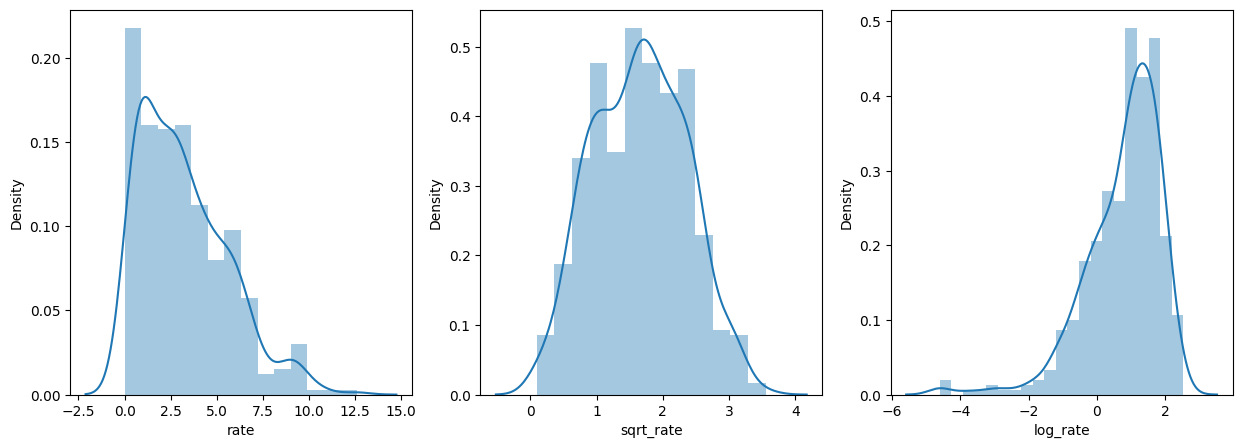

In [24]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.distplot(df['rate'],ax =axes[0])
sns.distplot(df['sqrt_rate'],ax =axes[1])
sns.distplot(df['log_rate'],ax =axes[2])


In [25]:
print(df.rate.skew())
print(df.sqrt_rate.skew())
print(df.log_rate.skew())

0.884204614329943
0.04964154055528862
-1.5943217626331552


In [26]:
print(df.rate.kurt())
print(df.sqrt_rate.kurt())
print(df.log_rate.kurt())

0.42437165143736433
-0.6318437642052039
4.157026150198228


In [27]:
Q1 = df.rate.quantile(0.25)
Q2 = df.rate.quantile(0.50)
Q3 = df.rate.quantile(0.75)

In [28]:
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR

<ipython-input-29-7c6641847cff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.rate)


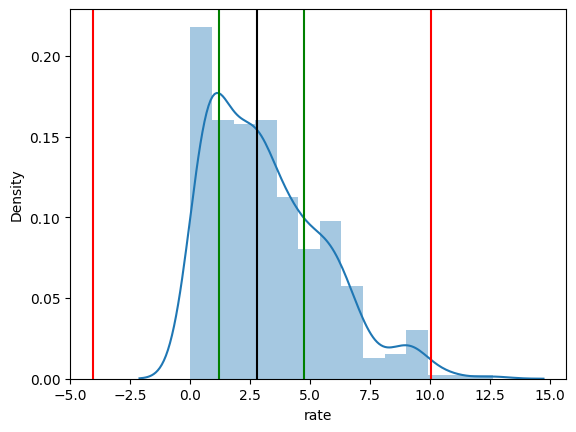

In [29]:
sns.distplot(df.rate)
plt.axvline(UB, color = 'r')
plt.axvline(LB, color = 'r')
plt.axvline(Q1, color = 'g')
plt.axvline(Q3, color = 'g')
plt.axvline(Q2, color = 'k')


In [30]:
df[(df.rate>UB)|(df.rate<LB)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate
client_id,,,,,,,,,
41480,credit,2947,1,10302.0,2005-11-10,2008-03-16,10.49,3.238827,2.350422
48177,other,6318,0,10224.0,2003-02-02,2005-05-08,10.89,3.300000,2.387845
49624,home,8133,1,10312.0,2009-03-14,2011-03-21,12.62,3.552464,2.535283


In [31]:
df = df[(df.rate<UB)&(df.rate>LB)]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 46109 to 26945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   loan_type    440 non-null    object        
 1   loan_amount  440 non-null    int64         
 2   repaid       440 non-null    int64         
 3   loan_id      440 non-null    float64       
 4   loan_start   440 non-null    datetime64[ns]
 5   loan_end     440 non-null    datetime64[ns]
 6   rate         440 non-null    float64       
 7   sqrt_rate    440 non-null    float64       
 8   log_rate     440 non-null    float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 34.4+ KB


In [33]:
df.rate.skew()

0.7594062707815686

In [34]:
df = df.drop(['rate','log_rate'],axis=1)

In [35]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,sqrt_rate
client_id,,,,,,,
46109,home,13672,0,10243.0,2002-04-16,2003-12-20,1.466288
46109,credit,9794,0,10984.0,2003-10-21,2005-07-17,1.118034
46109,home,12734,1,10990.0,2006-02-01,2007-07-05,0.824621
46109,cash,12518,1,10596.0,2010-12-08,2013-05-05,1.113553
46109,credit,14049,1,11415.0,2010-07-07,2012-05-21,1.769181


In [36]:
df.describe()

,loan_amount,repaid,loan_id,loan_start,loan_end,sqrt_rate
count,440.000000,440.000000,440.000000,440,440,440.000000
mean,7997.195455,0.534091,11022.131818,2007-08-06 08:46:54.545454592,2009-08-26 22:28:21.818181888,1.641194
min,559.000000,0.000000,10009.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.100000
25%,4235.750000,0.000000,10510.500000,2003-10-20 00:00:00,2005-09-16 06:00:00,1.103402
50%,8345.500000,1.000000,11034.500000,2007-03-10 12:00:00,2009-03-22 12:00:00,1.662828
75%,11752.750000,1.000000,11530.250000,2011-08-06 12:00:00,2013-09-22 12:00:00,2.163316
max,14971.000000,1.000000,11991.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,3.148015
std,4179.435966,0.499404,580.585543,NaN,NaN,0.685104


In [37]:
df2 = df[['sqrt_rate','loan_amount','repaid','loan_id']]

In [38]:
s = StandardScaler()
scaled_data = s.fit_transform(df2)

In [39]:
scaled_data

array([[-0.25558915,  1.35933754, -1.07067337, -1.3435035 ],
       [-0.76449035,  0.43040493, -1.07067337, -0.06575297],
       [-1.19325276,  1.13464987,  0.93399166, -0.05540681],
       ...,
       [ 1.07518928,  0.31901925, -1.07067337, -1.49697151],
       [ 0.70160583, -0.91029538, -1.07067337, -1.18831113],
       [-1.87138955, -1.04300003, -1.07067337,  0.71020889]])

In [40]:
m = MinMaxScaler()

In [41]:
scaled_data_m = m.fit_transform(df2)

In [42]:
print(scaled_data_m)

[[0.44825492 0.90986678 0.         0.11806256]
 [0.33399898 0.64078546 0.         0.49192735]
 [0.2377354  0.84478213 1.         0.49495459]
 ...
 [0.7470346  0.60852068 0.         0.07315843]
 [0.66315952 0.25242853 0.         0.16347124]
 [0.08548354 0.21398834 0.         0.71897074]]


In [43]:
df3  = pd.get_dummies(df['loan_type'])

In [44]:
df3.head()

,cash,credit,home,other
client_id,,,,
46109,False,False,True,False
46109,False,True,False,False
46109,False,False,True,False
46109,True,False,False,False
46109,False,True,False,False


In [45]:
l = LabelEncoder()
df['endoced_loan_type'] = l.fit_transform(df['loan_type'])

In [46]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,sqrt_rate,endoced_loan_type
client_id,,,,,,,,
46109,home,13672,0,10243.0,2002-04-16,2003-12-20,1.466288,2
46109,credit,9794,0,10984.0,2003-10-21,2005-07-17,1.118034,1
46109,home,12734,1,10990.0,2006-02-01,2007-07-05,0.824621,2
46109,cash,12518,1,10596.0,2010-12-08,2013-05-05,1.113553,0
46109,credit,14049,1,11415.0,2010-07-07,2012-05-21,1.769181,1


In [47]:
l.classes_

array(['cash', 'credit', 'home', 'other'], dtype=object)

In [48]:
import datetime as dt

In [49]:
df['loan_duration'] = df['loan_end'] - df['loan_start']

In [50]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,sqrt_rate,endoced_loan_type,loan_duration
client_id,,,,,,,,,
46109,home,13672,0,10243.0,2002-04-16,2003-12-20,1.466288,2,613 days
46109,credit,9794,0,10984.0,2003-10-21,2005-07-17,1.118034,1,635 days
46109,home,12734,1,10990.0,2006-02-01,2007-07-05,0.824621,2,519 days
46109,cash,12518,1,10596.0,2010-12-08,2013-05-05,1.113553,0,879 days
46109,credit,14049,1,11415.0,2010-07-07,2012-05-21,1.769181,1,684 days


In [51]:
df['loan_duration'] = df['loan_duration'].dt.days

In [52]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,sqrt_rate,endoced_loan_type,loan_duration
client_id,,,,,,,,,
46109,home,13672,0,10243.0,2002-04-16,2003-12-20,1.466288,2,613
46109,credit,9794,0,10984.0,2003-10-21,2005-07-17,1.118034,1,635
46109,home,12734,1,10990.0,2006-02-01,2007-07-05,0.824621,2,519
46109,cash,12518,1,10596.0,2010-12-08,2013-05-05,1.113553,0,879
46109,credit,14049,1,11415.0,2010-07-07,2012-05-21,1.769181,1,684


In [53]:
df['loan_duration'] = df['loan_duration']/365

In [54]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,sqrt_rate,endoced_loan_type,loan_duration
client_id,,,,,,,,,
46109,home,13672,0,10243.0,2002-04-16,2003-12-20,1.466288,2,1.679452
46109,credit,9794,0,10984.0,2003-10-21,2005-07-17,1.118034,1,1.739726
46109,home,12734,1,10990.0,2006-02-01,2007-07-05,0.824621,2,1.421918
46109,cash,12518,1,10596.0,2010-12-08,2013-05-05,1.113553,0,2.408219
46109,credit,14049,1,11415.0,2010-07-07,2012-05-21,1.769181,1,1.873973


In [55]:
X = df.drop(['loan_start','loan_end','loan_type','repaid'],axis=1)

In [56]:
X.head()

,loan_amount,loan_id,sqrt_rate,endoced_loan_type,loan_duration
client_id,,,,,
46109,13672,10243.0,1.466288,2,1.679452
46109,9794,10984.0,1.118034,1,1.739726
46109,12734,10990.0,0.824621,2,1.421918
46109,12518,10596.0,1.113553,0,2.408219
46109,14049,11415.0,1.769181,1,1.873973


In [57]:
y = df['repaid']

In [58]:
y.head()

client_id
46109    0
46109    0
46109    1
46109    1
46109    1
Name: repaid, dtype: int64

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [60]:
X_train.head()

,loan_amount,loan_id,sqrt_rate,endoced_loan_type,loan_duration
client_id,,,,,
26945,1728,10248.0,2.295648,1,1.400000
49068,11871,11154.0,2.019901,0,2.065753
25707,11403,11649.0,2.338803,1,1.654795
41480,8624,11277.0,1.086278,1,2.073973
26695,3455,11728.0,1.529706,1,2.408219


### Logistic regression


In [61]:
lr = LogisticRegression(solver = 'saga',multi_class = 'multinomial')
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='saga')

In [62]:
y_pred_test = lr.predict(X_test)

In [63]:
y_pred_train = lr.predict(X_train)

In [64]:
confusion_matrix(y_test,y_pred_test)

array([[ 0, 40],
       [ 0, 48]])

In [65]:
confusion_matrix(y_train,y_pred_train)

array([[  0, 165],
       [  0, 187]])

In [66]:
print(accuracy_score(y_train,y_pred_train))

0.53125


In [67]:
print(accuracy_score(y_test,y_pred_test))

0.5454545454545454


In [68]:
models = {

    "Logistic Regression ": LogisticRegression(random_state=1),
    "Logistic Regression L1": LogisticRegression(penalty='l1', solver='saga', random_state=1),
    "Logistic Regression L2": LogisticRegression(penalty='l2', random_state=1),
    "Logistic Regression ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=1 ),

    #With C
    "Logistic Regression with C": LogisticRegression(random_state=1 , C = 0.5),
    "Logistic Regression L1 with C": LogisticRegression(penalty='l1', solver='saga', random_state=1 , C = 0.5),
    "Logistic Regression L2 with C": LogisticRegression(penalty='l2', random_state=1 , C = 0.5),
    "Logistic Regression ElasticNet with C": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=1 , C = 0.5),
    #With weight
    "Logistic Regression with weight": LogisticRegression(random_state=1 ,class_weight = 'balanced' ),
    "Logistic Regression L1 with weight": LogisticRegression(penalty='l1', solver='saga', random_state=1 ,class_weight = 'balanced' ),
    "Logistic Regression L2 with weight": LogisticRegression(penalty='l2', random_state=1 ,class_weight = 'balanced' ),
    "Logistic Regression ElasticNet with weight": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=1 ,class_weight = 'balanced' ),
    #With diff solvers
    "Logistic Regression with liblinear": LogisticRegression(random_state=1 , solver = 'liblinear'),
    "Logistic Regression with saga": LogisticRegression(solver='saga', random_state=1 ),
    "Logistic Regression with newton-cg": LogisticRegression( random_state=1 , solver = 'newton-cg' ),
    "Logistic Regression with newton-cholesky": LogisticRegression(solver='newton-cholesky'),
    "Logistic Regression with sag": LogisticRegression(solver='sag')

}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Displaying the results
results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

                                            Accuracy  Precision  F1 Score
Logistic Regression                         0.545455   0.545455  0.705882
Logistic Regression L1                      0.545455   0.545455  0.705882
Logistic Regression L2                      0.545455   0.545455  0.705882
Logistic Regression ElasticNet              0.545455   0.545455  0.705882
Logistic Regression with C                  0.545455   0.545455  0.705882
Logistic Regression L1 with C               0.545455   0.545455  0.705882
Logistic Regression L2 with C               0.545455   0.545455  0.705882
Logistic Regression ElasticNet with C       0.545455   0.545455  0.705882
Logistic Regression with weight             0.465909   0.511628  0.483516
Logistic Regression L1 with weight          0.386364   0.411765  0.341463
Logistic Regression L2 with weight          0.465909   0.511628  0.483516
Logistic Regression ElasticNet with weight  0.386364   0.411765  0.341463
Logistic Regression with liblinear    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### NB

In [163]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_test = nb.predict(X_test)
y_pred_train = nb.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.5625
0.5227272727272727


In [76]:
mn = MultinomialNB()
mn.fit(X_train,y_train)

MultinomialNB()

In [77]:
y_pred_test = mn.predict(X_test)

In [78]:
y_pred_train = mn.predict(X_train)

In [79]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.5198863636363636
0.4318181818181818


In [161]:
mn = MultinomialNB(alpha = 0.001)
mn.fit(X_train,y_train)
y_pred_test = mn.predict(X_test)
y_pred_train = mn.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.5198863636363636
0.4318181818181818


### Decision Tree

In [80]:
dt = DecisionTreeClassifier()

In [81]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

1.0
0.45454545454545453


In [95]:
dt = DecisionTreeClassifier(
    max_depth= 5,
    min_samples_split= 2,
    min_samples_leaf= 10,
    max_features='sqrt',
    random_state=1
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

results = {
    "Train accuracy": accuracy_score(y_train, y_pred_train),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}

results_df = pd.DataFrame(results, index=[0])
print(results_df)

   Train accuracy  Accuracy  Precision  F1 Score
0        0.659091  0.590909   0.611111  0.647059


### Random Forest

In [114]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

1.0
0.625


In [155]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth = 10,
                            min_samples_split = 5,
                            min_samples_leaf = 6,
                            max_features = 'sqrt',
                            random_state = 1
                            )
rf.fit(X_train,y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.8948863636363636
0.625
